In [1]:
from DecisionTree import DecisionTreeClassifier, DecisionTreeRegressor
import numpy as np

In [2]:
dtc = DecisionTreeClassifier()
dtc.fit (np.array([[0,0,0,0]]), np.array([0]))

In [3]:
print(dtc)

Leaf: 0


In [4]:
X = np.random.random((10,2))
y = np.random.randint(0, 3, size=(10))
dtc = DecisionTreeClassifier(criterion='entropy', min_samples_split=2)
dtc.fit(X, y)
#y_pred = dtc.predict(X)
#print(y_pred, y, (y_pred==y).sum()/y.shape[0] )

print(dtc)

Decision: 0 < 0.5382930082371575 ?
  Decision: 1 < 0.8504203294659689 ?
    Decision: 0 < 0.350064175025098 ?
      Decision: 0 < 0.22273371008240123 ?
        Leaf: 1
        Leaf: 2
      Leaf: 1
    Leaf: 0
  Decision: 0 < 0.7266717861383161 ?
    Leaf: 2
    Decision: 0 < 0.8463653210235175 ?
      Leaf: 0
      Decision: 0 < 0.9486458041163452 ?
        Leaf: 2
        Leaf: 0


In [5]:
dtc.predict(np.array([[0,2,0,0]]))

array([0.])

In [6]:
import sklearn.datasets
import matplotlib.pyplot as plt

In [94]:
X, y = sklearn.datasets.make_blobs(centers = 3)

In [95]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=2)
dtc.fit(X, y)
print(dtc)

Decision: 0 < 1.1576328174988098 ?
  Decision: 1 < -1.7638096734994633 ?
    Leaf: 1
    Leaf: 0
  Leaf: 2


In [96]:
from DecisionTree import Leaf, InternalNode
def add_decision_lines(node, x_lim, y_lim):
    if isinstance(node, InternalNode):
        decision = node.decision
        if decision.feature == 0:
            plt.vlines(x=decision.threshold, ymin=y_lim[0], ymax=y_lim[1])
            add_decision_lines(node.leftNode, (x_lim[0],decision.threshold), y_lim)
            add_decision_lines(node.rightNode,(decision.threshold,x_lim[1]) , y_lim)
        else:
            plt.hlines(y=decision.threshold, xmin=x_lim[0], xmax=x_lim[1])
            add_decision_lines(node.leftNode, x_lim,(y_lim[0],decision.threshold) )
            add_decision_lines(node.rightNode, x_lim,(decision.threshold,y_lim[1]))


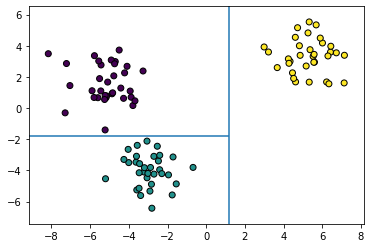

In [97]:
plt.scatter(X[:,0],X[:,1],c=y, edgecolor='k')
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
add_decision_lines(dtc.root, (x_min, x_max), (y_min, y_max))

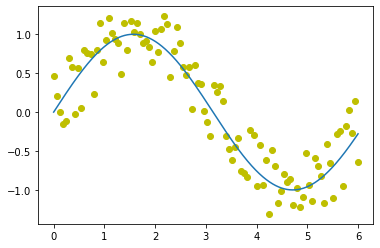

In [98]:
X = np.linspace(0,6,1000)
y = np.sin(X)
plt.plot(X,y)


X_train = np.linspace(0,6,100)
y_train = np.sin(X_train)+np.random.random(100)-0.5

plt.scatter(X_train,y_train, color='y')

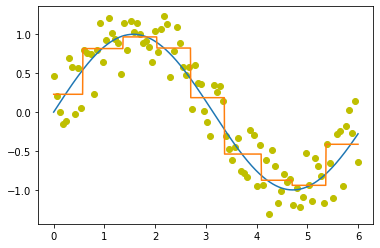

In [108]:
dtr = DecisionTreeRegressor(min_samples_leaf=10)

dtr.fit(X_train.reshape((-1,1)),y_train)
y_pred = dtr.predict(X.reshape((-1,1)))
plt.plot(X,y)
plt.plot(X, y_pred)
plt.scatter(X_train,y_train, color='y')

In [109]:
print(dtr)

Decision: 0 < 3.3636363636363638 ?
  Decision: 0 < 2.6969696969696972 ?
    Decision: 0 < 0.5757575757575757 ?
      Leaf: 0.2288611281749283
      Decision: 0 < 1.3636363636363638 ?
        Leaf: 0.8162148112121463
        Decision: 0 < 2.0303030303030303 ?
          Leaf: 0.9660605535955178
          Leaf: 0.8230369716404279
    Leaf: 0.18539759993175453
  Decision: 0 < 5.363636363636364 ?
    Decision: 0 < 4.090909090909091 ?
      Leaf: -0.5391329498860226
      Decision: 0 < 4.696969696969697 ?
        Leaf: -0.8757772791962957
        Leaf: -0.9408755079582363
    Leaf: -0.41352193259647
